
Model of "A 32.2 TOPS/W SRAM Compute-in-Memory Macro Employing a Linear 8-bit
C-2C Ladder for Charge Domain Computation in 22nm for Edge Inference", VLSI 2022
--------------------------------------------------------------------------------

Paper by Hechen Wang, Renzhi Liu, Richard Dorrance, Deepak Dasalukunte, Xiaosen
Liu, Dan Lake, Brent Carlton, and May Wu

## Description of The Macro

The macro uses a 512-row by 128-column SRAM array. Every eight adjacent columns
store 8b weight slices and together compute one 8b MAC operation. An 8b voltage
DAC provides 8b inputs in a single cycle. An analog-digital C-2C multiplier
computes a MAC operation between an 8b analog input and an 8b digital weight.
These multipliers allow the macro to compute 8b MACs in a single cycle and read
the results with one ADC convert. Furthermore, they allow the macro to avoid
connecting memory cells to analog circuits.

Every eight rows in the array share a C-2C multiplier. These rows are activated
in separate cycles, so it requires eight cycles to activate all rows in the
array.

Some of the important variables for wang_vlsi_2022:

- *ARRAY_WORDLINES*: 512 rows in the array
- *ARRAY_BITLINES*: 128 columns in the array
- *ARRAY_PARALLEL_INPUTS*: 64 input slice(s) consumed in each cycle.
- *ARRAY_PARALLEL_WEIGHTS*: 1024 weights slice(s) used for computation in each cycle.
- *ARRAY_PARALLEL_OUTPUTS*: 16 output(s) produced in each cycle.
- *TECHNOLOGY*: 22 nm
- *ADC_RESOLUTION*: 8 bit(s)
- *DAC_RESOLUTION*: 8 bit(s)
- *N_ADC_PER_BANK*: 16 ADC(s)
- *SUPPORTED_INPUT_BITS*: 8 bit(s)
- *SUPPORTED_OUTPUT_BITS*: 8 bit(s)
- *SUPPORTED_WEIGHT_BITS*: 8 bit(s)
- *BITS_PER_CELL*: 1 bit(s)
- *CIM_UNIT_WIDTH_CELLS*: 8 adjacent cell(s) in a wordline store bit(s) in one weight slice and process one input & output slice together
- *CIM_UNIT_DEPTH_CELLS*: 8 adjacent cell(s) in a bitline operate in separate cycles
- *CELL_CONFIG*: None 
- *GLOBAL_CYCLE_SECONDS*: 4.660762089428718e-09 clock period

### Macro Level

- *Input Path*: 8b inputs are encoded as an analog voltage level by an 8b
  voltage DAC. The DAC is composed of two R-2R ladders, one for positive inputs
  and one for negative (realized as a voltage above or below VDD/2). DAC energy
  exhibits significant data-value-dependence because larger values create larger
  swings in the DAC output voltage. After the DAC, inputs are passed through row
  drivers to go to the array. Select wordline drivers select a weight row to
  multiply with the input. While, in reality, inputs do not actually pass
  through the select drivers, we have them here to correctly model accesses
  (each new input requires selecting a new row).
- *Weight Path*: Weight drivers are used to rewrite weights in the array.
- *Output Path*: Column drivers read analog outputs from the array. After the
  column drivers, an 8b SAR ADC converts analog outputs to digital.

Next, there are 16 columns of sub banks. Each of these columns will compute an
8b output. Inputs are reused between columns of sub banks (*i.e.,* each
input-carrying wire is connected to all columns of sub banks), while outputs and
weights are not reused.

### Column Of Sub Banks Level

- *Input Path*: Each input is passed directly to a sub bank.
- *Weight Path*: A column bandwidth limiter sets the read and write bandwidth of
  each array column. Each weight is then passed to a row in the column.
- *Output Path*: Outputs also pass through a column bandwidth limiter to set the
  read and write bandwidth of each array column.
  
Next, there are 64 sub banks in each column of sub banks. Each sub bank will
compute one MAC operation in each cycle. Outputs are reused between sub banks
(*i.e.,* outputs are summed on wires between sub banks) while inputs and weights
are not reused.

### Sub Bank Level

Each sub bank contains 64 SRAM devices and a multiplier to compute an 8b MAC
operation.

- *Input Path*: 8b analog inputs are passed to the analog port of the C-2C
  multiplier.
- *Weight Path*: 8b digital weights are stored in the CiM unit. The CiM unit
  stores eight separate 8b weights that are selected and used in separate
  cycles. After being selected, 8b digital weights are passed to the analog port
  of the C-2C multiplier.
- *Output Path*: Computed outputs are passed directly up the hierarchy.

Inside the CiM unit, 8x8x8 (8b input x 8b weight x 8b output) virtualized MAC
units compute the MAC operation.


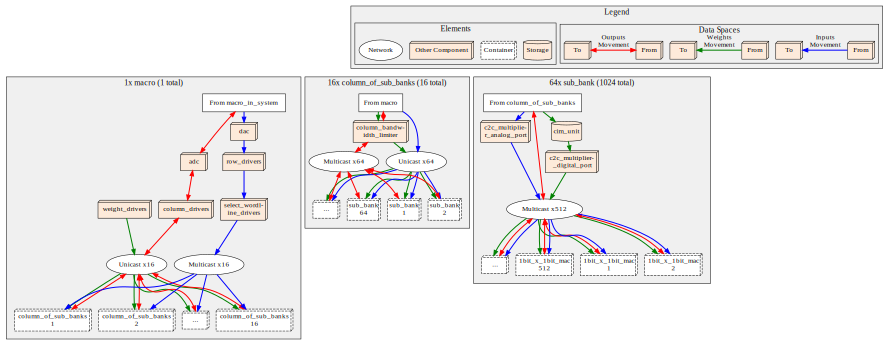

In [1]:
from _tests import scripts
from scripts.notebook_utils import *

display_markdown(
    f"""
Model of "A 32.2 TOPS/W SRAM Compute-in-Memory Macro Employing a Linear 8-bit
C-2C Ladder for Charge Domain Computation in 22nm for Edge Inference", VLSI 2022
--------------------------------------------------------------------------------

Paper by Hechen Wang, Renzhi Liu, Richard Dorrance, Deepak Dasalukunte, Xiaosen
Liu, Dan Lake, Brent Carlton, and May Wu

## Description of The Macro

The macro uses a 512-row by 128-column SRAM array. Every eight adjacent columns
store 8b weight slices and together compute one 8b MAC operation. An 8b voltage
DAC provides 8b inputs in a single cycle. An analog-digital C-2C multiplier
computes a MAC operation between an 8b analog input and an 8b digital weight.
These multipliers allow the macro to compute 8b MACs in a single cycle and read
the results with one ADC convert. Furthermore, they allow the macro to avoid
connecting memory cells to analog circuits.

Every eight rows in the array share a C-2C multiplier. These rows are activated
in separate cycles, so it requires eight cycles to activate all rows in the
array.

{get_important_variables_markdown('wang_vlsi_2022')}

### Macro Level

- *Input Path*: 8b inputs are encoded as an analog voltage level by an 8b
  voltage DAC. The DAC is composed of two R-2R ladders, one for positive inputs
  and one for negative (realized as a voltage above or below VDD/2). DAC energy
  exhibits significant data-value-dependence because larger values create larger
  swings in the DAC output voltage. After the DAC, inputs are passed through row
  drivers to go to the array. Select wordline drivers select a weight row to
  multiply with the input. While, in reality, inputs do not actually pass
  through the select drivers, we have them here to correctly model accesses
  (each new input requires selecting a new row).
- *Weight Path*: Weight drivers are used to rewrite weights in the array.
- *Output Path*: Column drivers read analog outputs from the array. After the
  column drivers, an 8b SAR ADC converts analog outputs to digital.

Next, there are 16 columns of sub banks. Each of these columns will compute an
8b output. Inputs are reused between columns of sub banks (*i.e.,* each
input-carrying wire is connected to all columns of sub banks), while outputs and
weights are not reused.

### Column Of Sub Banks Level

- *Input Path*: Each input is passed directly to a sub bank.
- *Weight Path*: A column bandwidth limiter sets the read and write bandwidth of
  each array column. Each weight is then passed to a row in the column.
- *Output Path*: Outputs also pass through a column bandwidth limiter to set the
  read and write bandwidth of each array column.
  
Next, there are 64 sub banks in each column of sub banks. Each sub bank will
compute one MAC operation in each cycle. Outputs are reused between sub banks
(*i.e.,* outputs are summed on wires between sub banks) while inputs and weights
are not reused.

### Sub Bank Level

Each sub bank contains 64 SRAM devices and a multiplier to compute an 8b MAC
operation.

- *Input Path*: 8b analog inputs are passed to the analog port of the C-2C
  multiplier.
- *Weight Path*: 8b digital weights are stored in the CiM unit. The CiM unit
  stores eight separate 8b weights that are selected and used in separate
  cycles. After being selected, 8b digital weights are passed to the analog port
  of the C-2C multiplier.
- *Output Path*: Computed outputs are passed directly up the hierarchy.

Inside the CiM unit, 8x8x8 (8b input x 8b weight x 8b output) virtualized MAC
units compute the MAC operation.
"""
)
display_diagram(get_diagram("wang_vlsi_2022", ignore=DIAGRAM_DEFAULT_IGNORE))


   ### Energy Efficiency, Throughput, and Compute Density

   This test replicates the results of Table III in the paper.

   In this test, we show the energy efficiency, throughput, and compute density
   of the macro at 0.7V and 1.1V supply voltages.

   We see that increasing the supply voltage increases throughput at the cost of
   lower energy efficiency.
   

100%|██████████| 2/2 [00:14<00:00,  7.21s/it]


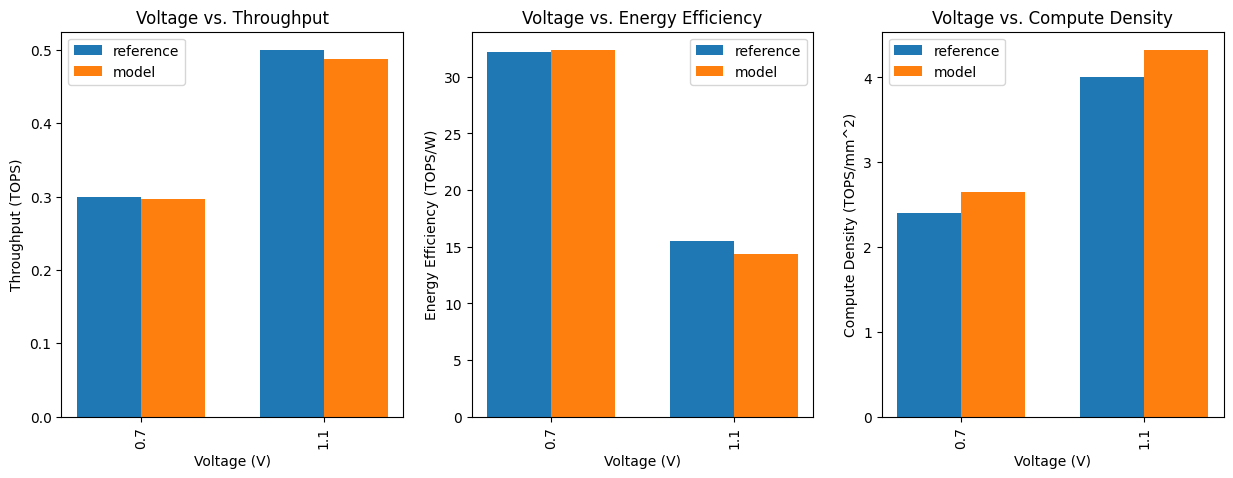

In [2]:
result = run_test("wang_vlsi_2022", "test_tops")

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
bar_side_by_side(
    {r.variables["VOLTAGE"]: r.tops for r in result},
    xlabel="Voltage (V)",
    ylabel="Throughput (TOPS)",
    title="Voltage vs. Throughput",
    ax=ax[0],
)
bar_side_by_side(
    {r.variables["VOLTAGE"]: r.tops_per_w for r in result},
    xlabel="Voltage (V)",
    ylabel="Energy Efficiency (TOPS/W)",
    title="Voltage vs. Energy Efficiency",
    ax=ax[1],
)
bar_side_by_side(
    {r.variables["VOLTAGE"]: r.tops_per_mm2 for r in result},
    xlabel="Voltage (V)",
    ylabel="Compute Density (TOPS/mm^2)",
    title="Voltage vs. Compute Density",
    ax=ax[2],
)


   ### Area Breakdown

   This test replicates the results of Fig. 22(b) of the paper.

   We show the area breakdown of the macro. The area is broken down into the
   following components:

   - ADC: Area consumed by the ADC
   - DAC: Area consumed by the DAC
   - MAC: Area consumed by the MAC, including the row drivers, select wordline
     drivers, CiM unit, and C-2C multiplier.
   - Misc: Area consumed by the weight drivers and control circuitry.

   Modeled miscellaneous area is lower than reference because we do not model
   the control circuitry in the weight drivers.

   

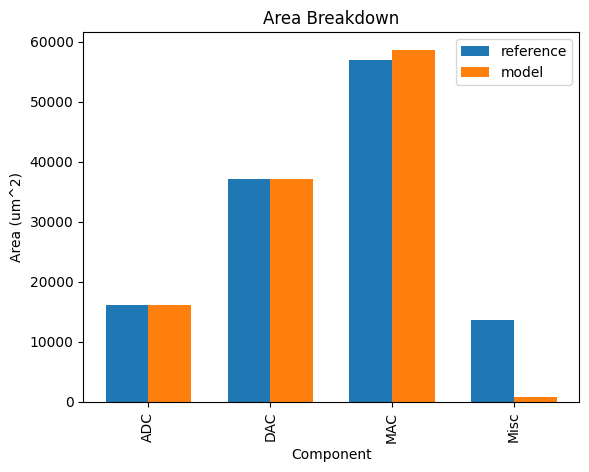

In [3]:
result = run_test("wang_vlsi_2022", "test_area_breakdown")
bar_side_by_side(
    result[0].get_compare_ref_area()*1e12,
    xlabel="Component",
    ylabel="Area (um^2)",
    title="Area Breakdown",
)


   ### Energy Breakdown

   This test replicates the results of Fig. 22(a) of the paper.

   We show the energy breakdown of the macro. The energy is broken down into
   the following components:

   - ADC: Energy consumed by the ADC
   - DAC: Energy consumed by the DAC
   - MAC: Energy consumed by the MAC, including the row drivers, select
     wordline drivers, CiM unit, and C-2C multiplier.
   - Misc: The weight drivers are miscellaneous components in our model, but
     they consume no energy in this weight-stationary test. Misc also includes
     control circuitry in the reference.

   Modeled miscellaneous energy is lower than reference because we do not model
   the control circuitry.

   

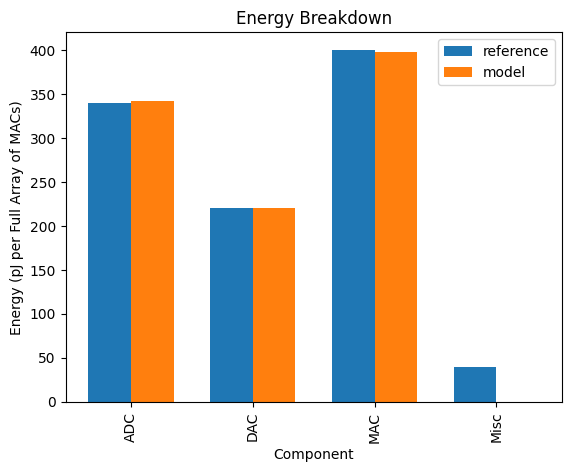

In [4]:
result = run_test("wang_vlsi_2022", "test_energy_breakdown")
bar_side_by_side(
    result[0].get_compare_ref_energy()*1e12,
    xlabel="Component",
    ylabel="Energy (pJ per Full Array of MACs)",
    title="Energy Breakdown",
)


   ### Voltage Scaling

   This test replicates the results of Fig. 23 of the paper.

   We show the effects of voltage scaling on the energy efficiency and
   throughput of the macro, testing supply voltages of 0.7V, 0.8V, 0.9V, 1V,
   and 1.1V.

   We can see that increasing the supply voltage increases throughput and
   compute density at the cost of lower energy efficiency.

   Modeled and reference compute density varies because we did not model the
   area of some miscellaneous components, leading to the model having a smaller
   area and higher compute density. This could be corrected by adding
   additional components to the model. We also use a different scaling factor
   for voltage versus energy, leading to a different curve shape. This could be
   corrected by adjusting the VOLTAGE_ENERGY_SCALE formula and propagating the
   value to each subcomponent model.
   

100%|██████████| 5/5 [00:26<00:00,  5.33s/it]


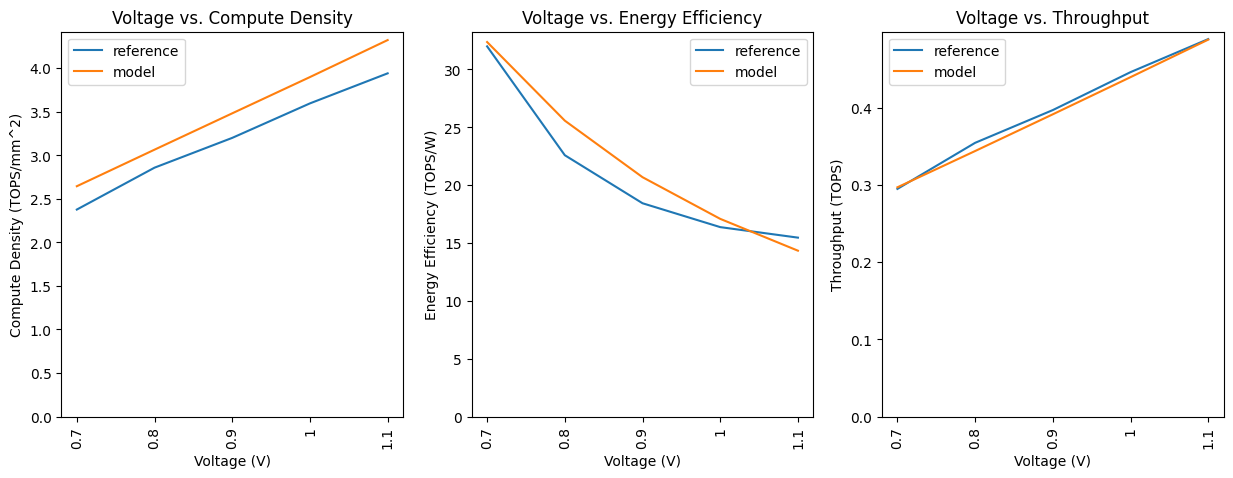

In [5]:
result = run_test("wang_vlsi_2022", "test_voltage_scaling")
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
plot(
    {r.variables["VOLTAGE"]: r.tops_per_mm2 for r in result},
    xlabel="Voltage (V)",
    ylabel="Compute Density (TOPS/mm^2)",
    title="Voltage vs. Compute Density",
    ax=ax[0],
)
plot(
    {r.variables["VOLTAGE"]: r.tops_per_w for r in result},
    xlabel="Voltage (V)",
    ylabel="Energy Efficiency (TOPS/W)",
    title="Voltage vs. Energy Efficiency",
    ax=ax[1],
)
plot(
    {r.variables["VOLTAGE"]: r.tops for r in result},
    xlabel="Voltage (V)",
    ylabel="Throughput (TOPS)",
    title="Voltage vs. Throughput",
    ax=ax[2],
)

Testing workload resnet18



   ### Exploration of Full-System Energy Efficiency

   In this test, we look at the full-system energy breakdown when running DNNs
   on a CiM accelerator. We place the macro in a chip with local input/output
   buffers, routers for on-chip data movement, a global buffer, and DRAM. We
   show the area and energy spent on DRAM, the global buffer, and other
   components.

   We compare three scenarios:

   1. Inputs, outputs, and weights stored off-chip in DRAM and fetched for each
      layer
   2. Inputs and outputs fetched from DRAM, weights stationary (pre-loaded for
      each layer)
   3. Weights stationary, layers fused to keep inputs/outputs on-chip in the
      global

   We can see that weight-stationary processing significantly reduces overall
   energy due to fewer weight fetches from off-chip. Benefits are limited,
   however, because inputs and outputs still must be fetched from off-chip. To
   see further benefits, fusing layers is necessary to keep data on-chip
   between DNN layers. We note that weight-stationary CiM requires sufficient
   memory to keep all DNN weights on-chip. To store large DNNs, this may
   require a multi-chip pipeline or dense storage technologies.
   

100%|██████████| 63/63 [04:41<00:00,  4.47s/it]  


Testing workload vision_transformer


100%|██████████| 222/222 [10:53<00:00,  2.95s/it]


Testing workload gpt2_medium


100%|██████████| 288/288 [07:40<00:00,  1.60s/it]


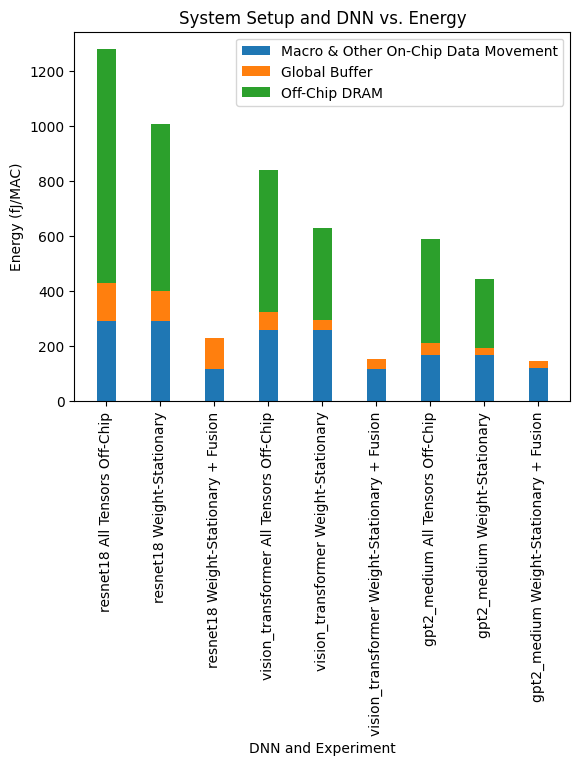

In [6]:
# This test may take a while. We'll be running several hundred layer+experiment combinations.
all_results = {}
for i, dnn in enumerate(["resnet18", "vision_transformer", "gpt2_medium"]):
    print(f"Testing workload {dnn}")
    results = run_test(
        "wang_vlsi_2022", "test_full_system_dnn", dnn_name=dnn, show_doc=i == 0
    )
    for r in results.aggregate_by("EXPERIMENT_NAME"):
        all_results[f'{dnn} {r.variables["EXPERIMENT_NAME"]}'] = r.per_compute("per_component_energy")*1e15

bar_stacked(
    all_results,
    xlabel="DNN and Experiment",
    ylabel="Energy (fJ/MAC)",
    title="System Setup and DNN vs. Energy",
    missing_ok=True,  # One of the experiments doesn't have main memory
)